REMOVE ANY DOUBTS FROM YOUR HEAD, IT'S US OR THEM

In [1]:
import os
from awpy import Demo

# remember you have parts for a demo 2 so u have 11 demos
demofolder = "./";
demofiles = [f for f in os.listdir(demofolder) if f.endswith(".dem")];
print(demofiles)
print(len(demofiles))

['3dmax-vs-big-m2-inferno_2378900.dem', 'eternal-fire-vs-3dmax-m1-inferno_2378906.dem', 'falcons-vs-eternal-fire-m1-inferno_2378781.dem', 'furia-vs-astralis-m1-inferno-p1_2378901.dem', 'furia-vs-astralis-m1-inferno-p2_2378901.dem', 'g2-vs-faze-m2-inferno-p1_2378905.dem', 'g2-vs-faze-m2-inferno-p2_2378905.dem', 'g2-vs-virtus-pro-m1-inferno_2378780.dem', 'mouz-vs-gamerlegion-m1-inferno_2378786.dem', 'virtus-pro-vs-vitality-m2-inferno_2378910.dem', 'vitality-vs-3dmax-m1-inferno_2378782.dem']
11


In [2]:
# gotta parse demos
def parsedemos():
    parsedata = {}
    for demo in demofiles:
        print("parsing demo: " + demo)
        dem = Demo(demo, verbose=True)
        dem.parse();
        print("parsed demo: " + demo)
        if dem:
            parsedata[demo] = dem
        else:
            print("failed to parse demo: " + demo)
    return parsedata

all_demos_data = parsedemos()

parsing demo: 3dmax-vs-big-m2-inferno_2378900.dem
2025-04-16 22:37:30.152 | DEBUG    | awpy.demo:parse:220 - Starting to parse 3dmax-vs-big-m2-inferno_2378900.dem
2025-04-16 22:37:43.672 | SUCCESS  | awpy.demo:parse:271 - Finished parsing 3dmax-vs-big-m2-inferno_2378900.dem, took 13.52 seconds
parsed demo: 3dmax-vs-big-m2-inferno_2378900.dem
parsing demo: eternal-fire-vs-3dmax-m1-inferno_2378906.dem
2025-04-16 22:37:58.350 | DEBUG    | awpy.demo:parse:220 - Starting to parse eternal-fire-vs-3dmax-m1-inferno_2378906.dem
2025-04-16 22:38:09.770 | SUCCESS  | awpy.demo:parse:271 - Finished parsing eternal-fire-vs-3dmax-m1-inferno_2378906.dem, took 11.42 seconds
parsed demo: eternal-fire-vs-3dmax-m1-inferno_2378906.dem
parsing demo: falcons-vs-eternal-fire-m1-inferno_2378781.dem
2025-04-16 22:38:37.514 | DEBUG    | awpy.demo:parse:220 - Starting to parse falcons-vs-eternal-fire-m1-inferno_2378781.dem
2025-04-16 22:38:50.036 | SUCCESS  | awpy.demo:parse:271 - Finished parsing falcons-vs-eter

GET THE BOMB {X,Y} COORDINATES

In [ ]:
import pandas as pd
import csv
points = []
pos_x = -2087
pos_y = 3870
scale = 4.9
print(type(demofiles))
with open("bombdata.csv", "w", newline="") as csvfile:
    onewriter = csv.writer(csvfile)
    onewriter.writerows([["X", "Y"]])
    for demo_name in demofiles:
        print(f"{demo_name}")
        demo_data = all_demos_data[demo_name]
        bish = demo_data.bomb
        print(f"planted in match {demo_name}")
        for row in bish.iter_rows():
            if row[1] == "plant":
                    # points.append((row[2], row[3]))
                    writer = csv.writer(csvfile)
                    # writer.writerow(["X coord", "Y coord"])
                    coord1 = (row[2]-pos_x)/scale
                    coord2 = (pos_y-(row[3]))/scale
                    writer.writerow([coord1, coord2])
                    print(f"Bomb planted at X coord: {(row[2]-pos_x)/scale} and Y coord: {(pos_y-row[3])/scale}")

# # Get the parsed data for that demo
# if demo_name in all_demos_data:
#     demo_data = all_demos_data[demo_name]
#     lappi = demo_data.bomb  
#     print(type(lappi))  # Print the bomb data for that demo
#     print(lappi.head())  # Print the first few rows of the bomb data
#     for row in lappi.iter_rows():
#         if row[1] == "plant":
#             print(f"Bomb planted at X coord: {row[2]} and Y coord: {row[3]}")
    # print((demo_data.bomb.filter(demo_data.bomb.event == "plant")))
    # # print(f"Y coordinate : {all_demos_data[demo_name].bomb[3]}")
    # print(f"✅ Loaded data for {demo_name}")
# else:
# if all_demos_data:
#     print(f"✅ Successfully parsed {len(all_demos_data)} demos")
# else:
#     print("❌ No demos were parsed. Check file paths or errors.")

<class 'list'>
3dmax-vs-big-m2-inferno_2378900.dem
planted in match 3dmax-vs-big-m2-inferno_2378900.dem
Bomb planted at X coord: 439.20435587565106 and Y coord: 150.8388671875
Bomb planted at X coord: 695.3832194010416 and Y coord: 614.5504150390625
Bomb planted at X coord: 675.5053100585938 and Y coord: 524.671875
Bomb planted at X coord: 441.5470479329427 and Y coord: 194.4818115234375
Bomb planted at X coord: 439.2495829264323 and Y coord: 150.32377115885416
Bomb planted at X coord: 675.94384765625 and Y coord: 613.1507034301758
Bomb planted at X coord: 438.85765584309894 and Y coord: 154.82438151041666
Bomb planted at X coord: 675.5055745442709 and Y coord: 524.671875
Bomb planted at X coord: 438.20440673828125 and Y coord: 164.24271647135416
Bomb planted at X coord: 438.88035074869794 and Y coord: 154.56062825520834
Bomb planted at X coord: 694.1912841796875 and Y coord: 614.3090565999349
eternal-fire-vs-3dmax-m1-inferno_2378906.dem
planted in match eternal-fire-vs-3dmax-m1-infern

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
df = pd.read_csv("bombdata.csv")

            X           Y
0  439.204356  150.838867
1  695.383219  614.550415
2  675.505310  524.671875
3  441.547048  194.481812
4  439.249583  150.323771


(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

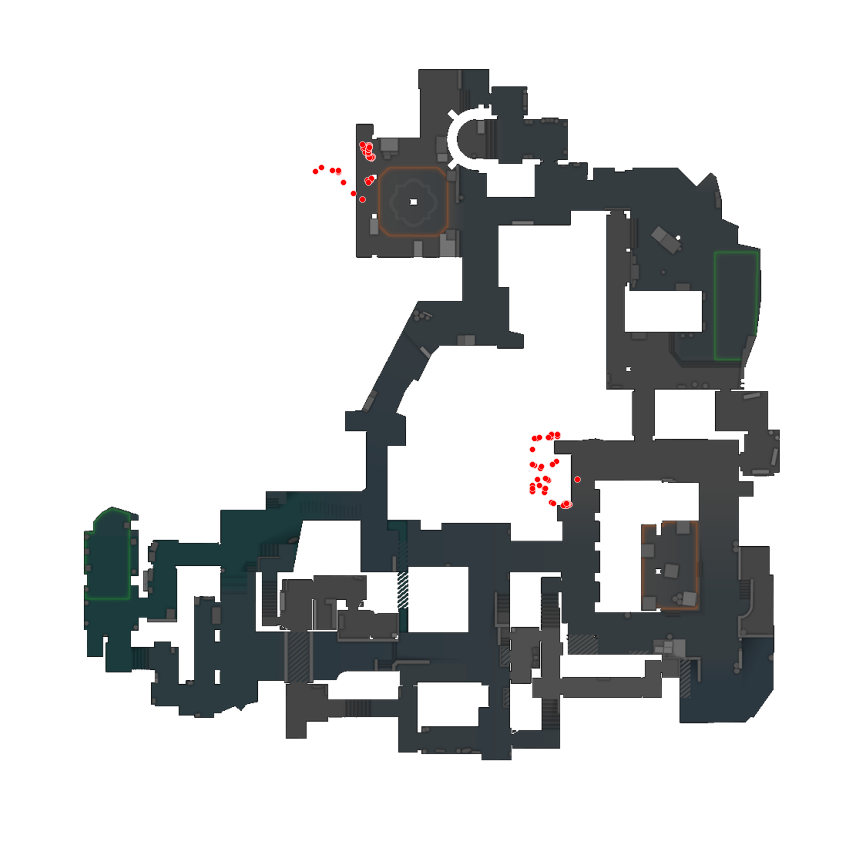

In [149]:
map_path = "maps_pngs/de_inferno.png"  # Path to the map image
print(df.head())
map_bg = mpimg.imread(map_path)
# plt.figure(figsize=(1024/300, 1024/300), dpi=300)
# plt.imshow(map_bg, aspect='auto', extent=[0, 1024, 0, 1024], zorder=-1)
# plt.scatter(df["X"], df["Y"], c='red',s=2, zorder=1)

figure, axes = plt.subplots(figsize=(1024 / 300, 1024 / 300), dpi=300)
axes.imshow(map_bg, zorder=0)
# axes.scatter(df["X"], df["Y"], c='blue', s=1, zorder=1)
sns.scatterplot(x=df["X"], y=df["Y"], color='red', s=2, zorder=1, ax=axes)
axes.axis("off")


In [ ]:
from awpy import Demo
demo1 = all_demos_data["virtus-pro-vs-vitality-m2-inferno_2378910.dem"];
demo1.parse(player_props=["health", "armor_value", "pitch", "yaw"])
print(demo1)

In [19]:
import polars as pl
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame
print(type(demo1.ticks))
kaka = demo1.ticks.to_pandas()  # Convert the ticks data to a pandas DataFrame
print(kaka)
with pl.Config(set_tbl_rows=5, set_tbl_cols=13, tbl_width_chars=152):
    print(demo1.ticks.head())  # Print the first few rows of the ticks data

<class 'polars.dataframe.frame.DataFrame'>
         health      place  armor side      pitch            X         yaw  \
0           100    CTSpawn      0   ct   0.000000  2353.000000   97.499878   
1           100    CTSpawn      0   ct   0.000000  2292.060059   70.000076   
2           100     TSpawn      0    t   0.000000 -1657.229980   -1.499969   
3           100    CTSpawn      0   ct   0.000000  2397.000000  135.000000   
4           100     TSpawn      0    t   0.000000 -1520.060059  -92.999954   
...         ...        ...    ...  ...        ...          ...         ...   
1529755      73  BombsiteA     97   ct   5.908234  2379.977051 -110.816345   
1529756      63  BombsiteA     87   ct   7.270889  1832.173950  -36.072235   
1529757       0   TopofMid      0   ct  15.508240  1452.225342   99.381287   
1529758       0        Pit      0    t -45.036392  2258.856934 -154.128571   
1529759       0   TopofMid      0    t   2.580750  1378.230103   -4.247925   

                   Y

plotting electronic (ct) at 1257.0902099609375, 2728.866455078125, 124.03165435791016
plotting FL4MUS (ct) at 2253.848388671875, 780.7701416015625, 153.4325714111328
plotting ropz (t) at -924.5482788085938, -188.25140380859375, 4.031248092651367
plotting ICY (ct) at 1472.503173828125, 2814.435302734375, 124.03187561035156
plotting ZywOo (t) at -934.8602905273438, -333.667236328125, 4.031248092651367
plotting flameZ (t) at -708.2632446289062, -229.10150146484375, -0.9896240234375
plotting apEX (t) at -575.0722045898438, 718.064697265625, -32.764892578125
plotting mezii (t) at -524.047119140625, 772.008056640625, -22.8973388671875
plotting fame (ct) at 1410.7740478515625, 2819.8935546875, 124.03189086914062
plotting FL1T (ct) at 1319.0931396484375, 2733.03173828125, 131.8850555419922


(<Figure size 1024x1024 with 1 Axes>, <Axes: >)

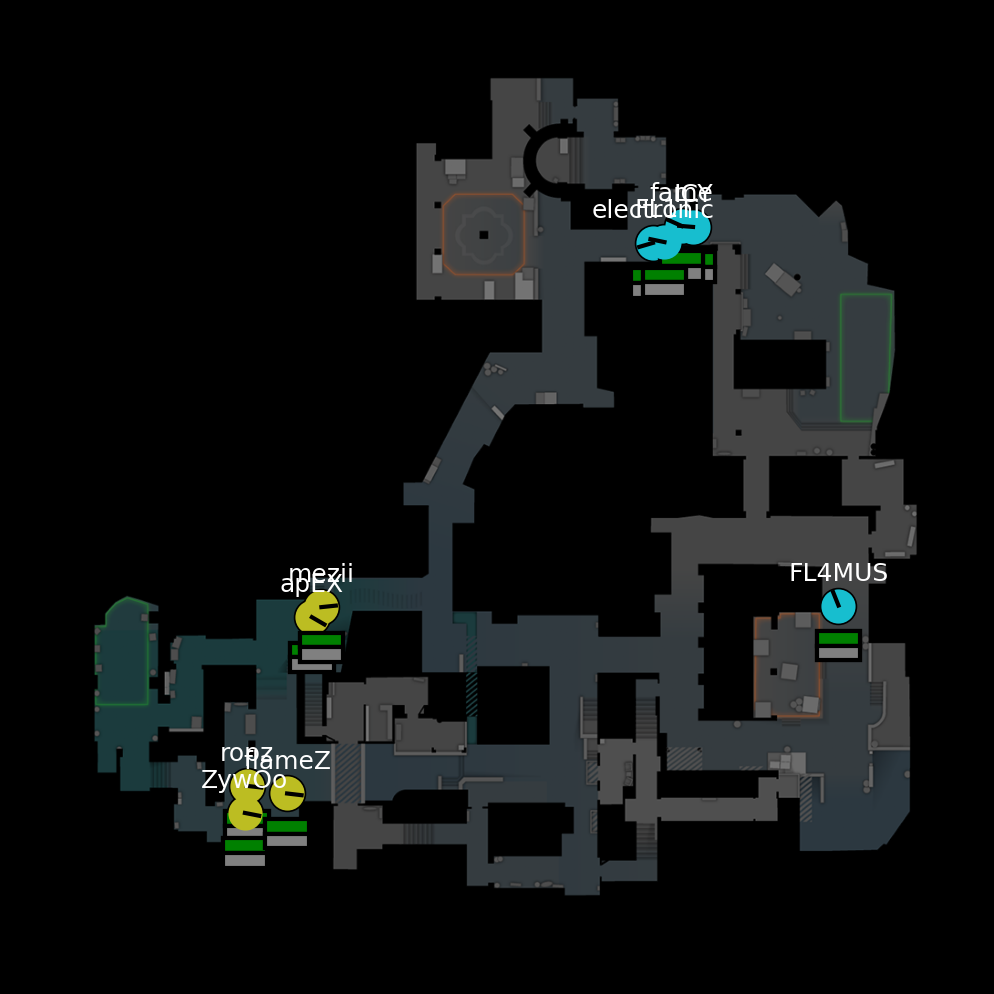

In [ ]:
import polars as pl
from awpy.plot import plot, PLOT_SETTINGS
# from awpy.plot.utils import get_map_bounds
# Get a random tick
frame_df = demo1.ticks.filter(pl.col("tick") == demo1.ticks["tick"])
frame_df = frame_df[
    ["X", "Y", "Z", "health", "armor", "pitch", "yaw", "side", "name"]
]

lappi = []
point_settings = []

for row in frame_df.iter_rows(named=True):
    lappi.append((row["X"], row["Y"], row["Z"]))
    print(f"plotting {row['name']} ({row['side']}) at {row['X']}, {row['Y']}, {row['Z']}")

    # Determine team and corresponding settings
    settings = PLOT_SETTINGS[row["side"]].copy()

    # Add additional settings
    settings.update(
        {
            "hp": row["health"],
            "armor": row["armor"],
            "direction": (row["pitch"], row["yaw"]),
            "label": row["name"],
        }
    )

    point_settings.append(settings)

plot(map_name="de_inferno", points=lappi, point_settings=point_settings)


In [13]:
import pandas as pd
import csv

points = []

print(type(demofiles))
with open("killsdata_inferno_iemkatowice2025.csv", "w", newline="") as csvfile:
    onewriter = csv.writer(csvfile)
    onewriter.writerows([["X", "Y"]])
    for demo_name in demofiles:
        print(f"{demo_name}")
        demo_data = all_demos_data[demo_name]
        bish = demo_data.kills
        print(f"killer coordinates in match {demo_name}")
        for row in bish.iter_rows():
            if row[8]!=None and row[9]!=None and row[10]!=None:
                points.append((row[9], row[10]))
                writer = csv.writer(csvfile)
                # writer.writerow(["X coord", "Y coord"])
                writer.writerow([row[9], row[10]])
                print(f"killer at X coord: {row[9]} and Y coord: {row[10]} and Z coord: {row[11]}")

<class 'list'>
3dmax-vs-big-m2-inferno_2378900.dem
killer coordinates in match 3dmax-vs-big-m2-inferno_2378900.dem
killer at X coord: 500.2327575683594 and Y coord: 3412.630126953125 and Z coord: 162.1857147216797
killer at X coord: 433.9281311035156 and Y coord: 3473.28466796875 and Z coord: 164.45941162109375
killer at X coord: 1161.6739501953125 and Y coord: 2762.572265625 and Z coord: 124.46743774414062
killer at X coord: 728.0933227539062 and Y coord: 1948.6822509765625 and Z coord: 136.03126525878906
killer at X coord: 676.7991943359375 and Y coord: 2110.25537109375 and Z coord: 138.82688903808594
killer at X coord: 709.123779296875 and Y coord: 2426.673583984375 and Z coord: 136.03146362304688
killer at X coord: 1821.68310546875 and Y coord: 225.80255126953125 and Z coord: 220.03128051757812
killer at X coord: 2040.083984375 and Y coord: 152.393310546875 and Z coord: 160.03125
killer at X coord: 1375.2159423828125 and Y coord: 1077.233154296875 and Z coord: 168.52200317382812
ki

In [4]:
import polars as pl
from awpy.plot import gif, PLOT_SETTINGS
from tqdm import tqdm

demo2 = Demo("virtus-pro-vs-vitality-m2-inferno_2378910.dem")
demo2.parse(player_props=["health", "armor_value", "pitch", "yaw"])
frames = []

for tick in tqdm(demo2.ticks.filter(pl.col("round_num") == 1)["tick"].unique().to_list()[::128]):
    frame_df = demo2.ticks.filter(pl.col("tick") == tick)
    frame_df = frame_df[
        ["X", "Y", "Z", "health", "armor", "pitch", "yaw", "side", "name"]
    ]

    points = []
    point_settings = []

    for row in frame_df.iter_rows(named=True):
        points.append((row["X"], row["Y"], row["Z"]))

        # Determine team and corresponding settings
        settings = PLOT_SETTINGS[row["side"]].copy()

        # Add additional settings
        settings.update(
            {
                "hp": row["health"],
                "armor": row["armor"],
                "direction": (row["pitch"], row["yaw"]),
                "label": row["name"],
            }
        )

        point_settings.append(settings)

    frames.append({"points": points, "point_settings": point_settings})

print("Finished processing frames. Creating gif...")
gif("de_inferno", frames, "de_inferno.gif", duration=100)

100%|██████████| 42/42 [00:00<00:00, 697.97it/s]


Finished processing frames. Creating gif...


100%|██████████| 42/42 [00:16<00:00,  2.55it/s]


In [1]:
import os
from awpy import Demo
demo2 = Demo("virtus-pro-vs-vitality-m2-inferno_2378910.dem")

In [27]:
from awpy.plot.utils import pixel_to_game_axis, game_to_pixel_axis

trans_x = game_to_pixel_axis("de_inferno",512,"x")
trans_y = game_to_pixel_axis("de_inferno",2716, "y")



In [28]:
print(trans_x)
print(trans_y)

530.408163265306
235.51020408163262


In [26]:
import pandas as pd
import csv
from awpy.plot.utils import pixel_to_game_axis, game_to_pixel_axis
points = []

print(type(demofiles))
with open("bbdata.csv", "w", newline="") as csvfile:
    onewriter = csv.writer(csvfile)
    onewriter.writerows([["X", "Y"]])
    for demo_name in demofiles:
        print(f"{demo_name}")
        demo_data = all_demos_data[demo_name]
        bish = demo_data.bomb
        print(f"bomb coordinates in match {demo_name}")
        for row in bish.iter_rows():
            if row[1] == "plant":
                points.append((1024 - game_to_pixel_axis("de_inferno", row[2], "x"), 1024 - game_to_pixel_axis("de_inferno", row[3], "y")))
                # points.append((row[9], row[10]))
                writer = csv.writer(csvfile)
                # writer.writerow(["X coord", "Y coord"])
                writer.writerow([game_to_pixel_axis("de_inferno", row[2], "x"), 1024- game_to_pixel_axis("de_inferno", row[3], "y")])
                # print(f"killer at X coord: {row[9]} and Y coord: {row[10]} and Z coord: {row[11]}")
                print(f"bomb planted at X coord: {row[2]} and Y coord: {row[3]}")

<class 'list'>
3dmax-vs-big-m2-inferno_2378900.dem
bomb coordinates in match 3dmax-vs-big-m2-inferno_2378900.dem
bomb planted at X coord: 548.2261352539062 and Y coord: 2964.966796875
bomb planted at X coord: 2085.29931640625 and Y coord: 182.697509765625
bomb planted at X coord: 1966.0318603515625 and Y coord: 721.96875
bomb planted at X coord: 562.2822875976562 and Y coord: 2703.109130859375
bomb planted at X coord: 548.4974975585938 and Y coord: 2968.057373046875
bomb planted at X coord: 1968.6630859375 and Y coord: 191.0957794189453
bomb planted at X coord: 546.1459350585938 and Y coord: 2941.0537109375
bomb planted at X coord: 1966.033447265625 and Y coord: 721.96875
bomb planted at X coord: 542.2264404296875 and Y coord: 2884.543701171875
bomb planted at X coord: 546.2821044921875 and Y coord: 2942.63623046875
bomb planted at X coord: 2078.147705078125 and Y coord: 184.14566040039062
eternal-fire-vs-3dmax-m1-inferno_2378906.dem
bomb coordinates in match eternal-fire-vs-3dmax-m1-i